# SCRAP FOOTBALL

Nos solicitan los datos de la cantidad de tarjetas amarillas y de las faltas cometidas, además de obtener la cantidad de goles anotados y recibidos.

### Trabajo realizado por Nicolas EMC para Tarjeta Bet.

In [1]:
### Importamos las librerias
import requests
from bs4 import BeautifulSoup
import pandas as pd

Obtendremos los datos de una página especializada en datos deportivos

In [2]:
url = 'https://fbref.com/en/comps/9/Premier-League-Stats'
fecha = input("Ingresa la fecha de hoy: ")

Ingresa la fecha de hoy: 0410


Con la libreria requests con el comando .get accederemos al website y luego crearemos un archivo html para realizar las consultas sin saturar la página

In [3]:
data = requests.get(url)
### para revisar la info
#data.text

## crear un archivo con la info de la página
with open("premier_2022.html","w+",encoding="utf-8") as f:
    f.write(data.text)

## Abrimos el archivo para crear la sopa
with open("premier_2022.html",encoding="utf-8") as f:
    page = f.read()


In [4]:
## Creamos la sopa y buscamos la tabla de las estadísticas generales
soup = BeautifulSoup(page, "html.parser")
tabla_1 = soup.find(id="results2022-202391_overall")

In [5]:
### hay que transformarlo a str, con [0] lo transformamos a dataframe
premier = pd.read_html(str(tabla_1))[0]

In [6]:
### Obtenemos los nombres de las columnas
premier.columns

Index(['Rk', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP',
       'xG', 'xGA', 'xGD', 'xGD/90', 'Last 5', 'Attendance', 'Top Team Scorer',
       'Goalkeeper', 'Notes'],
      dtype='object')

In [7]:
### Nombramos y eliminamos columnas innecesarias, luego lo ordenamos alfabeticamente
premier.set_axis(['Rank','Equipo','Partidos','Ganados','Empates','Perdidos','Goles a Favor','Goles en Contra','Gol Dif','Ptos','Pts x Partido','x1','x2','x3','x4','Ultimos 5','Asistencias por partidos 90 min','Anotador estrella','Arquero','Borrar2'],axis='columns', inplace=True)
premier.drop(['x1','x2','x3','x4','Borrar2'], axis = 1, inplace = True)
premier.sort_values('Equipo', ascending=True)

,Rank,Equipo,Partidos,Ganados,Empates,Perdidos,Goles a Favor,Goles en Contra,Gol Dif,Ptos,Pts x Partido,Ultimos 5,Asistencias por partidos 90 min,Anotador estrella,Arquero
0,1,Arsenal,8,7,0,1,20,8,12,21,2.63,W W L W W,60122,Gabriel Jesus - 5,Aaron Ramsdale
13,14,Aston Villa,8,2,2,4,6,10,-4,8,1.00,L L D W D,41567,"Ollie Watkins, Leon Bailey... - 1",Emiliano Martínez
12,13,Bournemouth,8,2,3,3,6,19,-13,9,1.13,L D W D D,10419,Philip Billing - 2,"Neto, Mark Travers"
9,10,Brentford,8,2,4,2,15,12,3,10,1.25,D D W L D,17069,Ivan Toney - 5,David Raya
3,4,Brighton,7,4,2,1,14,8,6,14,2.00,W W L W D,31230,Leandro Trossard - 5,Robert Sánchez
4,5,Chelsea,7,4,1,2,10,10,0,13,1.86,L W L W W,39941,Raheem Sterling - 3,Edouard Mendy
16,17,Crystal Palace,7,1,3,3,8,11,-3,6,0.86,W L D D L,24385,Wilfried Zaha - 4,Vicente Guaita
10,11,Everton,8,2,4,2,7,7,0,10,1.25,D D D W W,39266,Anthony Gordon - 2,Jordan Pickford
7,8,Fulham,8,3,2,3,13,15,-2,11,1.38,L W L W L,22286,Aleksandar Mitrović - 6,Bernd Leno
11,12,Leeds United,7,2,3,2,10,10,0,9,1.29,W L D L D,36410,Rodrigo - 4,Illan Meslier


In [8]:

### Buscamos los valores de las tarjetas 
tabla_2 = soup.find(id="stats_squads_misc_for")

In [9]:
premier_2 = pd.read_html(str(tabla_2))[0]

In [10]:
premier_2.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Performance       \
               Squad               # Pl                90s        CrdY CrdR   
0            Arsenal                 21                8.0          15    0   
1        Aston Villa                 21                8.0          20    0   
2        Bournemouth                 23                8.0          15    0   
3          Brentford                 22                8.0          10    0   
4           Brighton                 19                7.0           8    0   

                                                          Aerial Duels       \
  2CrdY  Fls  Fld Off  Crs  Int TklW PKwon PKcon OG Recov          Won Lost   
0     0   91  116  11   90  112   84     0     1  1   712          120  125   
1     0  118  115  18  114   84   99     0     1  1   734          159  147   
2     0  115   96   6   57   89   80     0     2  2   552          126  142   
3     0   77   90  16  100  106   81     1     0  0   648          157  142   
4     0   85   68   9   89  112   67     3     0  3   601           99  128   

         
   Won%  
0  49.0  
1  52.0  
2  47.0  
3  52.5  
4  43.6

Al notar que tiene subniveles, debemos eliminar el primer nivel para poder trabajar correctamente con las columnas 

In [11]:
### Con .droplevel reducimos un nivel en las columnas
premier_2 = premier_2.droplevel([0], axis=1)

In [12]:
### Visualizamos el dataset 
premier_2

,Squad,# Pl,90s,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,Int,TklW,PKwon,PKcon,OG,Recov,Won,Lost,Won%
0,Arsenal,21,8.0,15,0,0,91,116,11,90,112,84,0,1,1,712,120,125,49.0
1,Aston Villa,21,8.0,20,0,0,118,115,18,114,84,99,0,1,1,734,159,147,52.0
2,Bournemouth,23,8.0,15,0,0,115,96,6,57,89,80,0,2,2,552,126,142,47.0
3,Brentford,22,8.0,10,0,0,77,90,16,100,106,81,1,0,0,648,157,142,52.5
4,Brighton,19,7.0,8,0,0,85,68,9,89,112,67,3,0,3,601,99,128,43.6
5,Chelsea,22,7.0,19,2,2,83,99,18,86,85,84,1,0,0,597,118,115,50.6
6,Crystal Palace,19,7.0,12,0,0,99,100,8,55,93,83,0,0,1,535,98,117,45.6
7,Everton,23,8.0,19,0,0,87,86,16,74,128,95,0,1,0,665,139,159,46.6
8,Fulham,24,8.0,23,1,0,92,75,15,75,137,83,2,1,0,634,158,150,51.3
9,Leeds United,22,7.0,18,1,1,110,86,6,66,88,87,0,1,0,671,128,133,49.0


In [13]:
### Re nombramos las columnas y eliminamos las columnas que no utilizaremos
premier_2.set_axis(['Equipo', 'Jugadores de equipo','90s','Amarillas','Rojas','2da Amarilla','Fouls cometidos','Faltas (tiro libre)','Offsides','Cruces','Intercepciones','Encaros positivos','PKwon','PKcon','Autogoles','Recuperacion de balon','Aereos Ganadas','Aereos Perdidas','% win'],axis='columns', inplace=True)
premier_2.drop(['PKwon','PKcon','90s'], axis = 1, inplace = True)

In [14]:
### Ordenamos los valores para que exista una correlación entre una tabla y otra
premier_2.sort_values('Equipo',ascending=True)

,Equipo,Jugadores de equipo,Amarillas,Rojas,2da Amarilla,Fouls cometidos,Faltas (tiro libre),Offsides,Cruces,Intercepciones,Encaros positivos,Autogoles,Recuperacion de balon,Aereos Ganadas,Aereos Perdidas,% win
0,Arsenal,21,15,0,0,91,116,11,90,112,84,1,712,120,125,49.0
1,Aston Villa,21,20,0,0,118,115,18,114,84,99,1,734,159,147,52.0
2,Bournemouth,23,15,0,0,115,96,6,57,89,80,2,552,126,142,47.0
3,Brentford,22,10,0,0,77,90,16,100,106,81,0,648,157,142,52.5
4,Brighton,19,8,0,0,85,68,9,89,112,67,3,601,99,128,43.6
5,Chelsea,22,19,2,2,83,99,18,86,85,84,0,597,118,115,50.6
6,Crystal Palace,19,12,0,0,99,100,8,55,93,83,1,535,98,117,45.6
7,Everton,23,19,0,0,87,86,16,74,128,95,0,665,139,159,46.6
8,Fulham,24,23,1,0,92,75,15,75,137,83,0,634,158,150,51.3
9,Leeds United,22,18,1,1,110,86,6,66,88,87,0,671,128,133,49.0


In [15]:
### Hacemos un merge entre las dos tablas, al estar ordenadas se puede hacer el join facilmente
df = pd.merge(premier,premier_2, on='Equipo')

In [16]:
### Ordenamos por mayoria de tarjetas amarillas 
df.sort_values("Amarillas", ascending= False, inplace= True)
df.head()

,Rank,Equipo,Partidos,Ganados,Empates,Perdidos,Goles a Favor,Goles en Contra,Gol Dif,Ptos,...,Faltas (tiro libre),Offsides,Cruces,Intercepciones,Encaros positivos,Autogoles,Recuperacion de balon,Aereos Ganadas,Aereos Perdidas,% win
19,20,Nott'ham Forest,8,1,1,6,6,21,-15,4,...,85,14,83,101,81,0,666,144,135,51.6
5,6,Manchester Utd,7,4,0,3,11,14,-3,12,...,54,14,54,100,59,0,575,127,99,56.2
7,8,Fulham,8,3,2,3,13,15,-2,11,...,75,15,75,137,83,0,634,158,150,51.3
13,14,Aston Villa,8,2,2,4,6,10,-4,8,...,115,18,114,84,99,1,734,159,147,52.0
10,11,Everton,8,2,4,2,7,7,0,10,...,86,16,74,128,95,0,665,139,159,46.6


In [17]:
### Creamos un excel para guardar la información
df.to_excel('premier_{}.xlsx'.format(fecha))

A modo de visualización, se presentará una foto del archivo que se ha creado

In [18]:
### Librerias necesarias para la visualización
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [19]:
## seleccionamos el nombre de la imagen
img = "dataset_premier.png"

In [20]:
### Abrimos la imagen
img = Image.open(img)


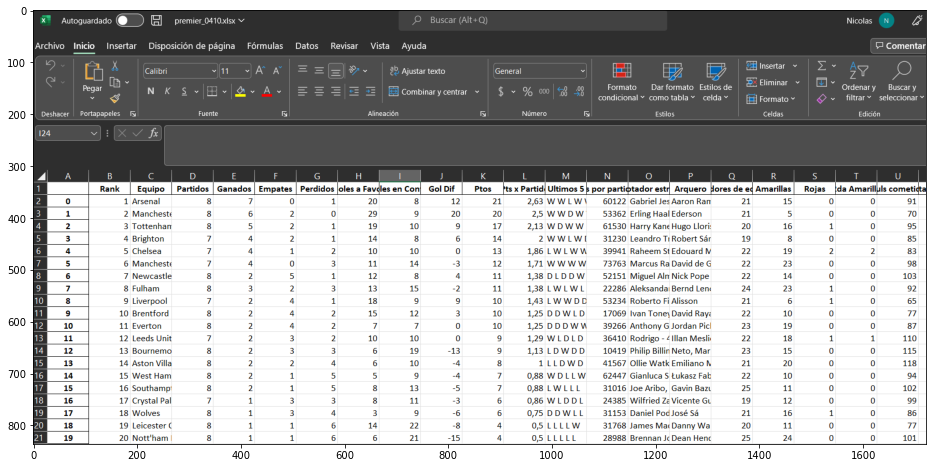

In [21]:
### Visualizamos y ajustamos la imagen 
plt.figure(figsize = (16,12))
imgplot = plt.imshow(img)
plt.show()